# Credit Card Fraud Detection

In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the above descriptive analysis it is confirmed that we have a signigicant class imbalance with the target varible. So we should keep this thing in mind in order to prevent overfitting while fitting machine learning models.

In [25]:
df.isnull().values.sum()

0

For privacy concerns, all the columns were transformed using PCA, so we don't have much information about those variable, except the Amount and time column. So the amount column is the only column which acts as the most imformative column.

In [16]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Distribution of Amount (Log Scaled)')

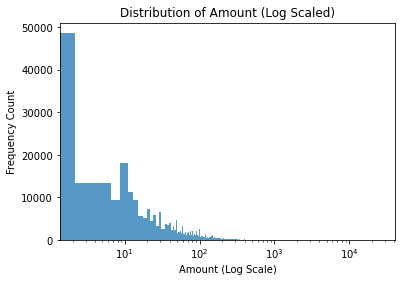

In [21]:
sns.histplot(data = df , x = "Amount").set(xscale = "log")
plt.xlabel("Amount (Log Scale)")
plt.ylabel("Frequency Count")
plt.title("Distribution of Amount (Log Scaled)")

### Data Cleaning

As all the columns except the Amount and Time have been transformed using PCA, so there is no point of cleaning all the other features. So we will just analyze and clean the Amount and Time column.

In [26]:
df['Amount'].isnull().values.sum()

0

Text(0.5, 1.0, 'Distribution of Amount Data Points')

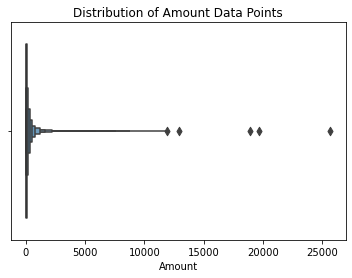

In [27]:
sns.boxenplot(data=df , x='Amount')
plt.xlabel("Amount")
plt.title("Distribution of Amount Data Points")

From the boxplot above we can observe a non-negligible amount of outliers on the upper end of the distribution.
We would assess the effect of this skewed distribution while building the models.

In [28]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [30]:
df.drop_duplicates(keep="last" , inplace=True)

### Correleation Analysis

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif_data = pd.DataFrame()
X = df.drop('Class' , axis = 1)
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]
print(vif_data)

   Feature        VIF
0     Time   2.352783
1       V1   1.624955
2       V2   3.903164
3       V3   1.256154
4       V4   1.141139
5       V5   2.757256
6       V6   1.528109
7       V7   2.504461
8       V8   1.098777
9       V9   1.019334
10     V10   1.114508
11     V11   1.029512
12     V12   1.012571
13     V13   1.003473
14     V14   1.027096
15     V15   1.014514
16     V16   1.000847
17     V17   1.005537
18     V18   1.007009
19     V19   1.038012
20     V20   2.239605
21     V21   1.100434
22     V22   1.083646
23     V23   1.154552
24     V24   1.000682
25     V25   1.013613
26     V26   1.000516
27     V27   1.010059
28     V28   1.001721
29  Amount  11.650240


As we can see that only the amount column, which is the most important column seems to be higly coreleated. All the other columns are not at all coreleated as the value is almost near to 1.

Now we will check how is the amount distribution between the classes.

In [36]:
#Splitting the Data
no_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

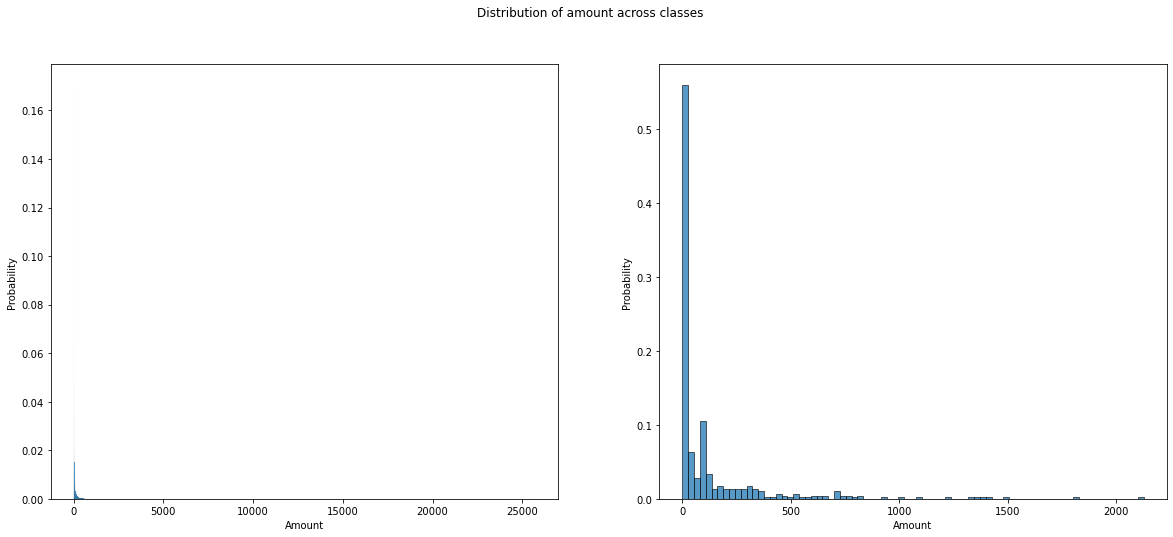

In [44]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (20 , 8))
fig.suptitle("Distribution of amount across classes")
sns.histplot(ax = ax1 , data = no_fraud , x = 'Amount' , stat = 'probability')
sns.histplot(ax = ax2 , data = fraud , x = 'Amount' , stat='probability')
plt.show()

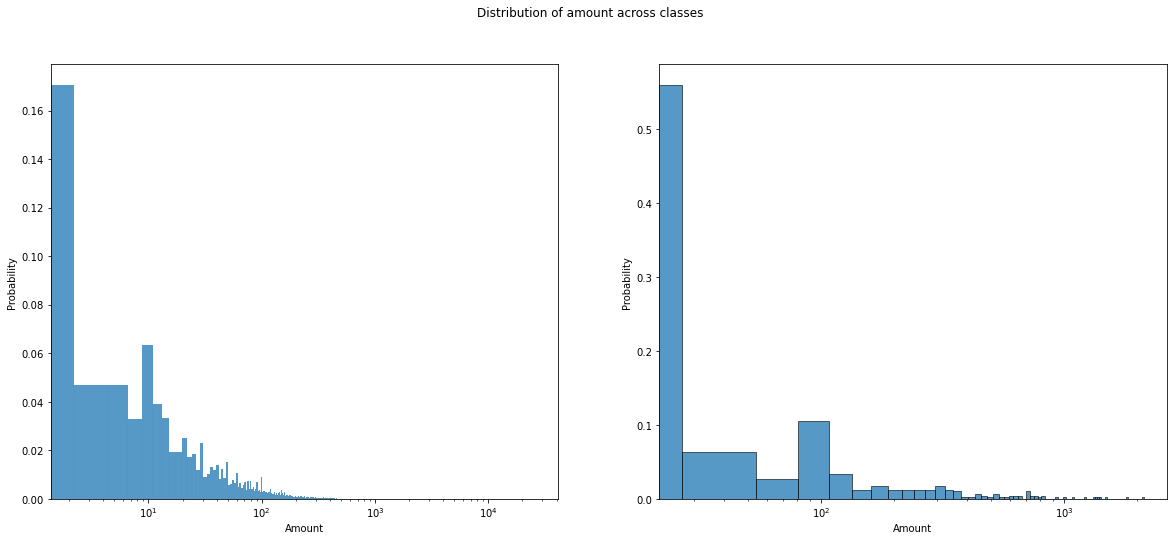

In [47]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (20 , 8))
fig.suptitle("Distribution of amount across classes")
sns.histplot(ax = ax1 , data = no_fraud , x = 'Amount' , stat = 'probability').set(xscale = 'log')
sns.histplot(ax = ax2 , data = fraud , x = 'Amount' , stat='probability').set(xscale = 'log')
plt.show()

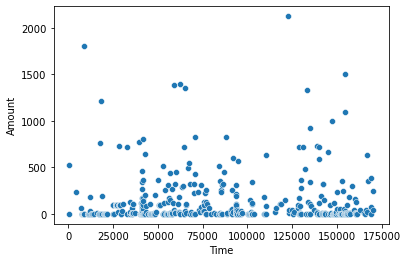

In [48]:
sns.scatterplot(data = fraud , x='Time' , y = 'Amount')
plt.show()

Looking at the scatter plot it is clear that fraud transcations took place completely at random time intervals.